In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


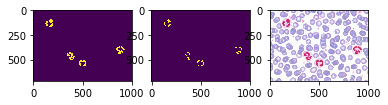

In [3]:
img=cv2.imread('neutrophilia_canine_blood_smear_high.jpeg')
blur = cv2.bilateralFilter(img,9,75,75)
grey=cv2.cvtColor(blur,cv2.COLOR_BGR2GRAY)

# plt.imshow(img)
# plt.show()
#thres=cv2.inRange(grey,66,180)

ret,th1 = cv2.threshold(grey,110,255,cv2.THRESH_BINARY)


ret,th2 = cv2.threshold(grey,130,255,cv2.THRESH_BINARY)


comple=cv2.bitwise_not(th1)
comple1=cv2.bitwise_not(th2)


kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
res = cv2.morphologyEx(comple,cv2.MORPH_OPEN,kernel)


kernel1 = np.ones((5,5), np.uint8)

img_erosion = cv2.erode(res, kernel1, iterations=1)

#edged=cv2.Canny(th1,15,200
plt.subplot(1,3,1)
plt.imshow(comple1)
plt.subplot(1,3,2)
plt.imshow(img_erosion)
plt.subplot(1,3,3)
plt.imshow(img)
plt.show()

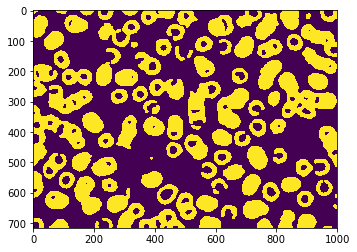

In [4]:
rbc=cv2.imread('neutrophilia_canine_blood_smear_high.jpeg')
blur = cv2.bilateralFilter(img,20,105,105)
RBC_grey=cv2.cvtColor(blur,cv2.COLOR_BGR2GRAY)

# plt.imshow(img)
# plt.show()
#RBC_thres=cv2.inRange(RBC_grey,140,140)
ret,th2 = cv2.threshold(RBC_grey,205,255,cv2.THRESH_BINARY)

RBC_comple=cv2.bitwise_not(th2)

sub=cv2.subtract(RBC_comple,comple1)



kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
res1 = cv2.morphologyEx(sub,cv2.MORPH_OPEN,kernel1)


# plt.imshow(res1)
# plt.show()

edged=cv2.Canny(res1,10,200)

plt.imshow(res1)
plt.show()

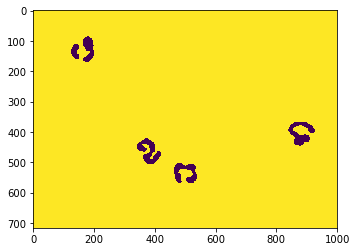

In [178]:
img1 = cv2.imread('neutrophilia_canine_blood_smear_high.jpeg')
img = cv2.imread('neutrophilia_canine_blood_smear_high.jpeg',0)
blur = cv2.GaussianBlur(img,(15,15),0)
equ = cv2.equalizeHist(blur)

ret,th2 = cv2.threshold(equ,4,255,cv2.THRESH_BINARY)


plt.imshow(th2)
plt.show()

edged=cv2.Canny(th2,10,200)
_, contours, _= cv2.findContours(edged,1,2)

In [184]:
cv2.drawContours(img1, contours, -1, (15, 255, 255), 3)
hull=[cv2.convexHull(cnt) for cnt in contours]
cv2.drawContours(img1, hull, -1, (0, 55, 255), 3)
print ("")

In [182]:
for cnt in contours:
        moments = cv2.moments(cnt)                          # Calculate moments
        if moments['m00']!=0:
            cx = int(moments['m10']/moments['m00'])         # cx = M10/M00
            cy = int(moments['m01']/moments['m00'])         # cy = M01/M00
            moment_area = moments['m00']                    # Contour area from moment
            contour_area = cv2.contourArea(cnt)             # Contour area using in_built function
            
            cv2.drawContours(img1,[cnt],0,(255,255,0),1)   # draw contours in green color
            cv2.circle(img1,(cx,cy),5,(0,0,255),-1) 

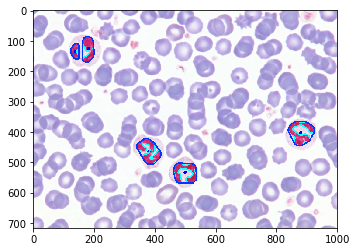

True

In [185]:
plt.imshow(img1)
plt.show()
cv2.imwrite("l2.png",img1)
#

In [31]:
import imutils